In [9]:
%run "../../../PyUtils/common.ipynb"
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcess
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import ensemble
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from statsmodels.regression.quantile_regression import QuantReg
import statsmodels.formula.api as smf
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

#Balances the classes in the dataframe at the desired index by duplicating entries for that index at random
#
#@param dataFrame - The dataFrame to add duplicates to
#@param index - The index that contains the class
def BalanceClassesWithDuplicates(dataFrame, index):
    newDF = dataFrame
    classes = dataFrame[index].unique()
    print("classes: [" + ''.join(str(e)+',' for e in classes)+']')
    numberOfClasses = len(dataFrame[index].unique())
    print("Number of Classes:" + str(numberOfClasses))
    
    sizeOfClasses=[]
    
    for aClass in classes:
        sizeOfClasses.append(len(dataFrame.values[dataFrame[index].values == aClass]))
    
    print("Size of Classes: [" + ''.join(str(e)+', ' for e in sizeOfClasses)+']')
    sizeOfLargestClass = max(sizeOfClasses)
    print("Size of Largest Class: " + str(sizeOfLargestClass))
    amountToAddToEachClass = []
    
    for classSize in sizeOfClasses:
        amountToAddToEachClass.append(sizeOfLargestClass - classSize)
        
    print("Amount to Add to Each Class: [" + ''.join(str(e)+', ' for e in amountToAddToEachClass)+']')
    
    k=0
    for amount in amountToAddToEachClass:
        for i in range(0,amount):
           newDF = newDF.append(dataFrame[dataFrame[index].values == classes[k]].sample(n=1, replace=True))
        
        k += 1
    
    
    return newDF;
    
#Balances the classes in the dataframe at the desired index by removing entries at random from the extra 
#represented classes
#
#@param dataFrame - The dataFrame to add duplicates to
#@param index - The index that contains the class
#def BalanceClassesRemoveExtras(dataFrame, index):


patient = "leeh2"
ampm = "am"
file = "http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20calculated_jlee%20WHERE%20ampm=%27"+ampm+"%27%20AND%20pname=%27"+patient+"%27%20ORDER%20BY%20date,%20time"

predictQuantile=False
lowerPercent = 0.20
upperPercent = 0.80

fileName = file;

dfOriginal = LoadDataSet(fileName, checkForDateTime=False);
#displayDFs (dfOriginal, maxrows=3 )
#for c in dfOriginal.columns: print (c,  end=', ')
dfOriginal

<IPython.core.display.Javascript object>

,pname,date,ampm,time,pef,pef_zone,tm_window,so2_max,co_max,o3_max,no2_max,pm10_max,so2_sum,co_sum,o3_sum,no2_sum,pm10_sum,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,winddirection,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperature_max,airpressure_max,precipitation_max,temperature_min,airpressure_min,precipitation_min,temperature_diff,airpressure_diff,precipitation_diff
0,leeh2,2015-03-11,am,09:00:00,253,Y,22.900,0.017,0.700,0.034,0.048,54.000,0.133,10.730,0.619,0.450,719.700,0.006,0.469,0.027,0.020,31.428,-1.200,2.600,200.000,63.000,3.500,-7.300,1013.000,1022.100,-1.100,-0.100,1018.500,65.000,-5.000,1013.000,38.000,4.900,5.500,27.000
1,leeh2,2015-03-12,am,09:01:00,256,Y,24.017,0.010,0.900,0.041,0.047,121.000,0.131,11.912,0.718,0.547,1124.750,0.005,0.496,0.030,0.023,46.832,1.200,2.500,270.000,53.000,3.500,-7.300,1012.600,1021.600,0.000,5.500,1013.000,73.000,-1.400,1007.600,50.000,6.900,5.400,23.000
2,leeh2,2015-03-13,am,09:30:00,254,Y,24.483,0.007,0.800,0.040,0.047,90.000,0.131,12.838,0.675,0.653,1066.750,0.005,0.524,0.028,0.027,43.570,3.600,2.100,360.000,90.000,7.100,2.100,1010.600,1019.500,4.600,4.900,1012.600,99.000,1.200,1008.100,41.000,3.700,4.500,58.000
3,leeh2,2015-03-14,am,09:11:00,222,Y,23.683,0.007,0.800,0.044,0.048,60.000,0.128,10.497,0.769,0.596,1027.667,0.005,0.443,0.032,0.025,43.392,2.300,1.900,20.000,51.000,3.700,-6.800,1017.100,1026.100,1.900,8.700,1017.100,90.000,0.100,1010.300,37.000,8.600,6.800,53.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,leeh2,2016-10-18,am,09:12:00,275,Y,23.983,0.006,0.800,0.048,0.060,95.000,0.104,12.830,0.520,0.750,1504.417,0.004,0.535,0.022,0.031,62.728,13.300,1.100,20.000,85.000,12.900,10.800,1013.200,1021.800,14.000,20.700,1013.200,98.000,12.400,1008.800,76.000,8.300,4.400,22.000
588,leeh2,2016-10-19,am,09:31:00,258,Y,24.317,0.010,1.100,0.026,0.076,116.000,0.114,19.005,0.205,1.359,2154.933,0.005,0.782,0.008,0.056,88.620,17.000,0.400,0.000,93.000,17.900,15.800,1011.000,1019.400,17.000,21.200,1013.400,98.000,13.300,1010.200,67.000,7.900,3.200,31.000
589,leeh2,2016-10-20,am,09:02:00,271,Y,23.517,0.011,0.900,0.061,0.075,121.000,0.128,16.858,0.429,1.262,1979.567,0.005,0.717,0.018,0.054,84.177,15.700,2.700,20.000,88.000,15.700,13.700,1012.200,1020.700,16.000,21.600,1012.200,98.000,14.400,1008.200,71.000,7.200,4.000,27.000
590,leeh2,2016-10-21,am,09:03:00,303,Y,24.017,0.006,0.800,0.050,0.075,122.000,0.096,13.497,0.570,0.877,1633.650,0.004,0.562,0.024,0.036,68.022,17.600,5.000,140.000,73.000,14.600,12.600,1012.500,1020.900,16.700,24.200,1012.500,88.000,15.700,1009.000,52.000,8.500,3.500,36.000


In [10]:
#Testing Funcions
classIndex='Class'
d = {'Xvariables': [11, 2, 23, 24, 5, 16, 17, 18], classIndex: [1, 0, 2, 2, 0, 1, 1, 1]}
testDF = pd.DataFrame(data=d)
print(testDF)
testDF = BalanceClassesWithDuplicates(testDF, classIndex)
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(testDF)

   Class  Xvariables
0      1          11
1      0           2
2      2          23
3      2          24
4      0           5
5      1          16
6      1          17
7      1          18
classes: [1,0,2,]
Number of Classes:3
Size of Classes: [4, 2, 2, ]
Size of Largest Class: 4
Amount to Add to Each Class: [0, 2, 2, ]
   Class  Xvariables
0      1          11
1      0           2
2      2          23
3      2          24
4      0           5
5      1          16
6      1          17
7      1          18
4      0           5
1      0           2
3      2          24
3      2          24


In [11]:
#Break into groups by percentage

dfOriginal.sort_values(by='pef', ascending=True, inplace=True)
dfOriginal.reset_index(drop=True, inplace=True)
numberOfElements = len(dfOriginal)
upperBoundary = upperPercent*numberOfElements
lowerBoundary = lowerPercent*numberOfElements
dfOriginal['percent_group']=-1

for i in dfOriginal.index:

    if i < lowerBoundary:
        dfOriginal['percent_group'][i] = 0

    elif i > upperBoundary : 
        dfOriginal['percent_group'][i] = 2

    else:
        dfOriginal['percent_group'][i] = 1

print(dfOriginal)

     pname        date ampm      time  pef pef_zone  tm_window  so2_max  co_max  o3_max  no2_max  pm10_max  so2_sum  co_sum  o3_sum  no2_sum  pm10_sum  so2_avg  co_avg  o3_avg  no2_avg  pm10_avg  temperaturec  windspeedms  winddirection  precipitationpercent  vaporpressurehpa  dewpointtemperaturec  airpressurehpa  sealevelpressurehpa  groundtemperaturec  temperature_max  airpressure_max  precipitation_max  temperature_min  airpressure_min  precipitation_min  temperature_diff  airpressure_diff  precipitation_diff  percent_group
0    leeh2  2016-01-30   am  09:00:00  190        R     22.000    0.007   0.800   0.025    0.057   129.000    0.121  12.800   0.187    0.899  1359.000    0.005   0.582   0.009    0.041    61.773        -2.100        3.000         50.000                92.000             4.800                -3.200        1017.100             1026.300              -2.700            4.800         1017.600             92.000           -2.100         1014.900             39.000      

In [12]:
df=dfOriginal.copy()

#1. Remove all the rows that does not have any pef values 

df=df.reset_index(drop=True)

#2. Combine 
df=df.fillna(0)
sdttm = df.date + " " + df.time
df.insert(0, 'sdttm', sdttm)
df.sdttm = pd.to_datetime(df.sdttm)

df.sort_values(by='sdttm', ascending=True, inplace=True)
alldrps = "cname, pname, date, time, ampm, timeofday, dateofmeasure, npt, pef1, pef2, pef3, temperature_diff, airpressure_diff, precipitation_diff, tm_window"
if predictQuantile:
    alldrps += ', pef_zone'
else:
    alldrps += ', percent_group'
drps  = alldrps.split(', ')
df=df.drop(drps, axis=1, errors='ignore')
df=df.reset_index(drop=True)

## <== do the following for SAP PA tool
#pef = df.pef;
#df=df.drop(['pef'], axis=1)
#df.insert(1, 'pef1', pef)

#pef[-10:]=0     # Set last 10 to zero for predictions
#df.insert(1, 'pef', pef)
#df.to_csv("HanD/hand1.csv", sep=';')

df1 = df.copy()
df1 = df1.set_index(df1.sdttm)
df1=df1.drop('sdttm', axis=1, errors='ignore')

nq = 5
lnq=list(range(0,nq))
s= pd.qcut(df1.pef, nq, labels=lnq )
df1.insert(1,"pefcat", s)
df1.pefcat = df1.pefcat.astype(str)

pefcol = df1['pef']



columns =  '''so2_max,co_max,o3_max,no2_max,pm10_max,so2_sum,co_sum,o3_sum,no2_sum,pm10_sum,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,winddirection,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,
 temperature_max,airpressure_max,precipitation_max,temperature_min,airpressure_min,precipitation_min'''
if predictQuantile:
    columns += ',percent_group'
else:
    columns += ',pef_zone'

#'''pefcat,pef_zone,so2_max,co_max,o3_max,no2_max,temperaturec,windspeedms,precipitationpercent,vaporpressurehpa,
#dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperature_max,airpressure_max,temperature_min'''

 
#amin,pmin,tmaxlesstmin,amaxlessamin,pmaxlesspmin'''
cs = [c.strip() for c in columns.split(',')]

df1=df1[cs]
#HTML(df1.to_html())
#displayDFs (df1, maxrows=3 )
df1

,so2_max,co_max,o3_max,no2_max,pm10_max,so2_sum,co_sum,o3_sum,no2_sum,pm10_sum,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,winddirection,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperature_max,airpressure_max,precipitation_max,temperature_min,airpressure_min,precipitation_min,pef_zone
sdttm,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-03-11 09:00:00,0.017,0.700,0.034,0.048,54.000,0.133,10.730,0.619,0.450,719.700,0.006,0.469,0.027,0.020,31.428,-1.200,2.600,200.000,63.000,3.500,-7.300,1013.000,1022.100,-1.100,-0.100,1018.500,65.000,-5.000,1013.000,38.000,Y
2015-03-12 09:01:00,0.010,0.900,0.041,0.047,121.000,0.131,11.912,0.718,0.547,1124.750,0.005,0.496,0.030,0.023,46.832,1.200,2.500,270.000,53.000,3.500,-7.300,1012.600,1021.600,0.000,5.500,1013.000,73.000,-1.400,1007.600,50.000,Y
2015-03-13 09:30:00,0.007,0.800,0.040,0.047,90.000,0.131,12.838,0.675,0.653,1066.750,0.005,0.524,0.028,0.027,43.570,3.600,2.100,360.000,90.000,7.100,2.100,1010.600,1019.500,4.600,4.900,1012.600,99.000,1.200,1008.100,41.000,Y
2015-03-14 09:11:00,0.007,0.800,0.044,0.048,60.000,0.128,10.497,0.769,0.596,1027.667,0.005,0.443,0.032,0.025,43.392,2.300,1.900,20.000,51.000,3.700,-6.800,1017.100,1026.100,1.900,8.700,1017.100,90.000,0.100,1010.300,37.000,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-18 09:12:00,0.006,0.800,0.048,0.060,95.000,0.104,12.830,0.520,0.750,1504.417,0.004,0.535,0.022,0.031,62.728,13.300,1.100,20.000,85.000,12.900,10.800,1013.200,1021.800,14.000,20.700,1013.200,98.000,12.400,1008.800,76.000,Y
2016-10-19 09:31:00,0.010,1.100,0.026,0.076,116.000,0.114,19.005,0.205,1.359,2154.933,0.005,0.782,0.008,0.056,88.620,17.000,0.400,0.000,93.000,17.900,15.800,1011.000,1019.400,17.000,21.200,1013.400,98.000,13.300,1010.200,67.000,Y
2016-10-20 09:02:00,0.011,0.900,0.061,0.075,121.000,0.128,16.858,0.429,1.262,1979.567,0.005,0.717,0.018,0.054,84.177,15.700,2.700,20.000,88.000,15.700,13.700,1012.200,1020.700,16.000,21.600,1012.200,98.000,14.400,1008.200,71.000,Y
2016-10-21 09:03:00,0.006,0.800,0.050,0.075,122.000,0.096,13.497,0.570,0.877,1633.650,0.004,0.562,0.024,0.036,68.022,17.600,5.000,140.000,73.000,14.600,12.600,1012.500,1020.900,16.700,24.200,1012.500,88.000,15.700,1009.000,52.000,Y


In [13]:
# from sklearn.neural_network import MLPClassifier
# nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

# clf = nn;

# Y_SCALER = None
# #Normalize the input and save the scalar for outcome variable "pefmax" in this case.
# scaler = StandardScaler()
# dp = prepareDF(df1, True)
# for c in dp.columns:
#     if ( c == 'pefcat'):
#         #Y_SCALER = StandardScaler()
#         #dp[c] = Y_SCALER.fit_transform(dp[c])
#         pass;
#     else:
#         dp[c] = scaler.fit_transform(dp[c])
        
# #dp = dp["so2,pef,o3,co,no2,pm10,tmax".split(',')]
# dp1 = dp.set_index(pd.Series(range(0,len(dp)) ) )

# X = dp1.ix[:, dp1.columns != 'pefcat']
# y = dp1.pefcat 
# X = X.as_matrix().astype(np.float)


# kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True)
# y_pred = y.copy()

# # Iterate through folds\
# i = 0;
# for train_index, test_index in kf.split(X):
#     #print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train = y[train_index]
#     # Initialize a classifier with key word arguments\
#     print ("*",i, end ="");
#     clf.fit(X_train,y_train)
#     y_pred[test_index] = clf.predict(X_test)
#     i = i +1;



Feature space holds 591 observations and 30 features
Unique target labels: ['Y' 'G' 'R']
* 0* 1* 2* 3* 4*
   DecisionTree Gini accuracy: 0.937394 
   DecisionTree Gini r^2 score: -0.305013
* 0* 1* 2* 3* 4*
   DecisionTree Entr accuracy: 0.939086 
   DecisionTree Entr r^2 score: -0.269013
* 0* 1* 2* 3* 4*
                 SVM accuracy: 0.947547 
                 SVM r^2 score: -0.062011
* 0* 1* 2* 3* 4*
                K-NN accuracy: 0.949239 
                K-NN r^2 score: -0.053011
* 0* 1* 2* 3* 4*
   Gradient Boosting accuracy: 0.944162 
   Gradient Boosting r^2 score: -0.161012
* 0* 1* 2* 3* 4*
    Logit Regression accuracy: 0.945854 
    Logit Regression r^2 score: -0.125011
* 0* 1* 2* 3* 4*
         Naive Bayes accuracy: 0.758037 
         Naive Bayes r^2 score: -4.121052


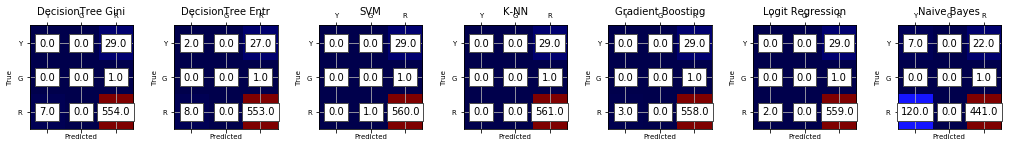

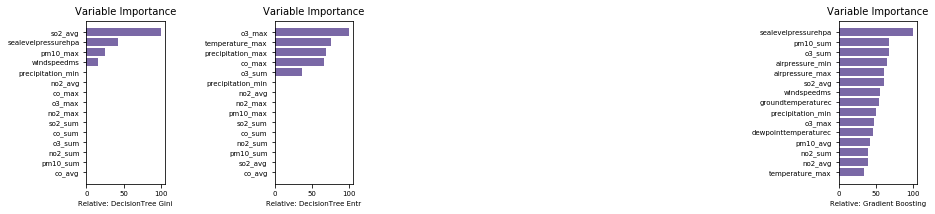

DecisionTree Gini Metrics
             precision    recall  f1-score   support

    class 0       0.00      0.00      0.00         1
    class 1       0.00      0.00      0.00       561
    class 2       0.05      1.00      0.09        29

avg / total       0.00      0.05      0.00       591

DecisionTree Entr Metrics
             precision    recall  f1-score   support

    class 0       0.00      0.00      0.00         1
    class 1       0.00      0.00      0.00       561
    class 2       0.05      0.93      0.09        29

avg / total       0.00      0.05      0.00       591

SVM Metrics
             precision    recall  f1-score   support

    class 0       0.00      0.00      0.00         1
    class 1       1.00      0.00      0.00       561
    class 2       0.05      1.00      0.09        29

avg / total       0.95      0.05      0.01       591

K-NN Metrics
             precision    recall  f1-score   support

    class 0       0.00      0.00      0.00         1
    class 1 

In [14]:
from sklearn.naive_bayes import GaussianNB

predictColumn = "pefcat"
predictColumn = "pef_zone"
if predictQuantile:
    predictColumn = "percent_group"

if ( 'pefcat' in df1.columns ):
    df1.pefcat = df1.pefcat.astype(int)
    df1=df1.drop('pefcat', axis=1)

cls = [# Comment/uncomment out any classfiers according to your need 
       # DO NOT CHANGE
        "DecisionTree Gini" , tree.DecisionTreeClassifier(max_depth=4, criterion="gini"),
        "DecisionTree Entr" , tree.DecisionTreeClassifier(max_depth=4, criterion="entropy"), 
        "SVM"               , sklearn.svm.SVC(kernel="linear"), 
#        "SVM1"              , SVC(kernel="rbf", C=10**3),
        "K-NN"              , sklearn.neighbors.KNeighborsClassifier(),
        "Gradient Boosting" , sklearn.ensemble.RandomForestClassifier(),
        "Logit Regression"  , sklearn.linear_model.LogisticRegression(),
#        "Neural NW"         , MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(25, 10), random_state=1),
        "Naive Bayes"       , GaussianNB()
];

y = df1[predictColumn]
X = df1.drop(predictColumn, axis=1)
a = Classify(X,y, True, drawConfusionMatrix=True, classifiers=cls, scale=True)
ik = 0
y_preds=[]
clsNames=[]

for i in cls:
    if type(i) is str:
        clsNames.append(i)
        y_pred = a[4][i]
        y_preds.append(y_pred)
        target_names = ['class 0', 'class 1', 'class 2']
        print(i + ' Metrics')
        y.replace(to_replace="R", value=0, inplace=True, limit=None, regex=False, method='pad', axis=None)
        y.replace(to_replace="Y", value=1, inplace=True, limit=None, regex=False, method='pad', axis=None)
        y.replace(to_replace="G", value=2, inplace=True, limit=None, regex=False, method='pad', axis=None)
        print(classification_report(y, y_pred, target_names=target_names))


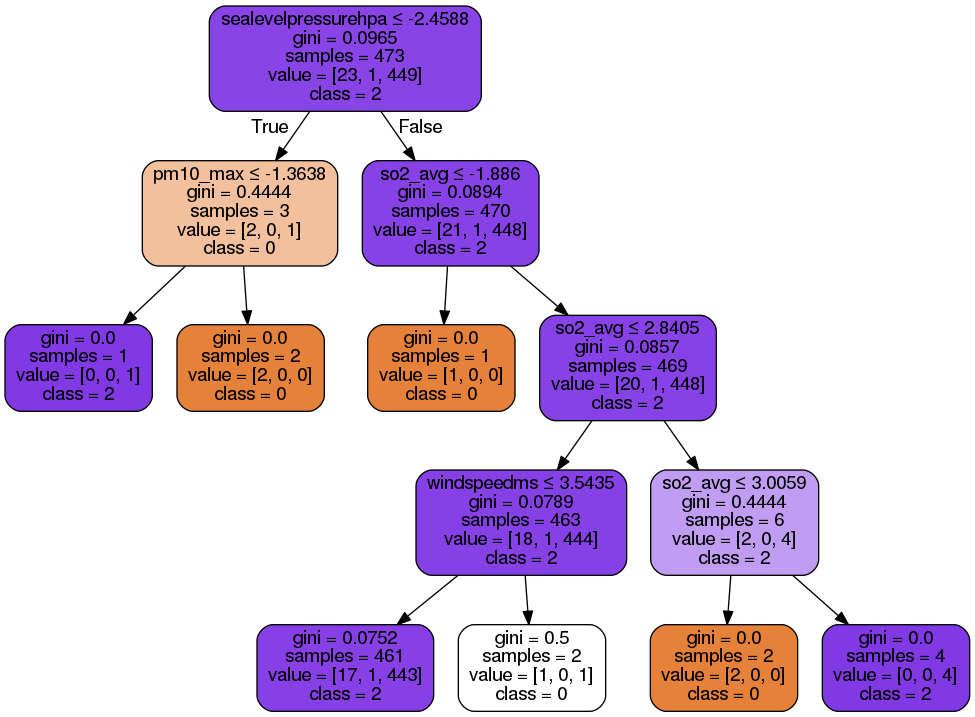

In [15]:
#(X1,y1,ra,cls) = Classify1(X,y, True, drawConfusionMatrix=True, classifiers=cls, scale=False)
DrawDecisionTree(X,y, cls[1])


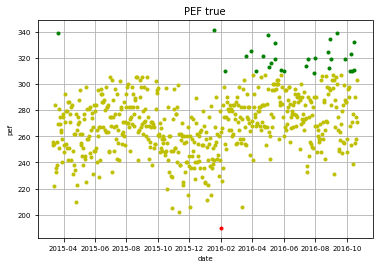

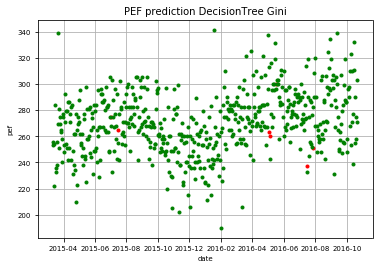

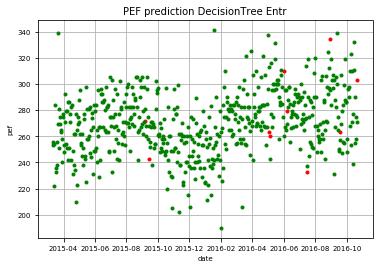

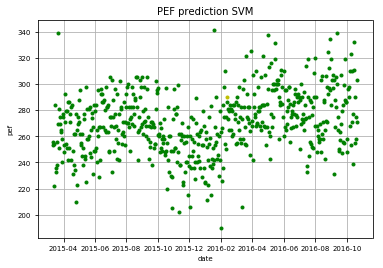

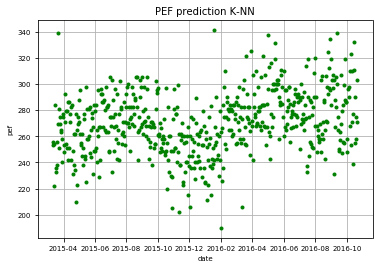

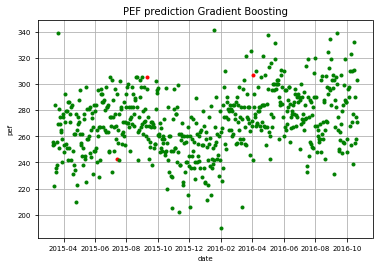

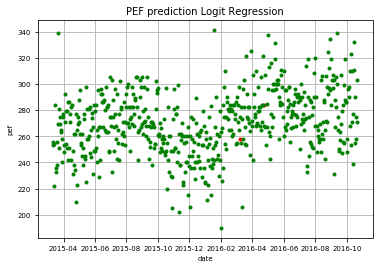

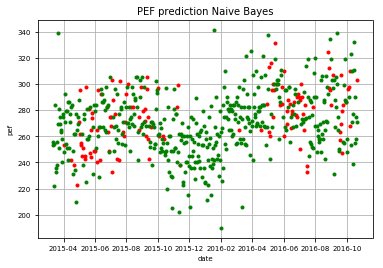

In [16]:
import matplotlib.pyplot as plt

#print(size(pefcol.values))
#print(size(y))
#print(y_pred)

plt.plot(pefcol.index[y == 0],pefcol.values[y == 0],'r.',pefcol.index[y == 1],pefcol.values[y == 1],'y.',pefcol.index[y == 2],pefcol.values[y == 2],'g.')

plt.xlabel('date')
plt.ylabel('pef')
plt.title('PEF true')
plt.grid(True)
plt.show()

i=0

for ypredicted in y_preds:
        plt.plot(pefcol.index[ypredicted == 0],pefcol.values[ypredicted == 0],'r.',pefcol.index[ypredicted == 1],pefcol.values[ypredicted == 1],'y.',pefcol.index[ypredicted == 2],pefcol.values[ypredicted == 2],'g.')

        plt.xlabel('date')
        plt.ylabel('pef')
        plt.title('PEF prediction ' + clsNames[i])
        plt.grid(True)
        plt.show()
        i+=1
